# Task 1: Data Understanding \& Preparation

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
import warnings 

warnings.filterwarnings('ignore')

## Loading the dataset

In [259]:
df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [260]:
n_samples = df.shape[0]

## Basic checks

In [261]:
df.drop_duplicates(ignore_index=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466673,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466674,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466675,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466676,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [262]:
duplicates = n_samples - df.shape[0]
print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))

Number of canceled duplicates: 5232/471910 (1.11%)


In [263]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [264]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object'})

In [265]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

This dataset contains 8 variables that correspond to:

- *BasketID*: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation;
- *BasketDate*: Invice Date and time. Numeric, the day and time when each transaction was generated;
- *Sale*: Unit price. Numeric, Product price per unit in sterling;
- *CustomerID*: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer;
- *CustomerCountry*: Country name. Nominal, the name of the country where each customer resides;
- *ProdID*: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product;
- *ProdDescr*: Product (item) name. Nominal;
- *Qta*: The quantities of each product (item) per transaction. Numeric.

In [266]:
df.isnull().sum()

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65073
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
dtype: int64

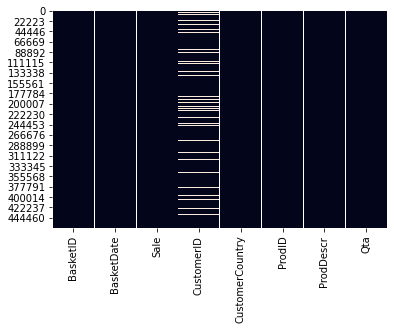

In [267]:
sns.heatmap(df.isnull(), cbar=False);

In [268]:
df.describe()

,Sale,Qta
count,466678.000000,466678.000000
mean,4.049057,10.806528
std,84.237135,232.627771
min,-11062.060000,-80995.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


## Data Cleaning and Integration

### Customer IDs

First of all, we are going to remove the entries for which the *CustomerID* variable is null:

In [269]:
df[df['CustomerID'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1406,536544,2010-01-12 14:32:00,2.51,NaN,United Kingdom,21774,DECORATIVE CATS BATHROOM BOTTLE,2
1407,536544,2010-01-12 14:32:00,1.66,NaN,United Kingdom,21787,RAIN PONCHO RETROSPOT,2
1408,536544,2010-01-12 14:32:00,1.66,NaN,United Kingdom,21790,VINTAGE SNAP CARDS,9
1409,536544,2010-01-12 14:32:00,2.51,NaN,United Kingdom,21791,VINTAGE HEADS AND TAILS CARD GAME,2
1410,536544,2010-01-12 14:32:00,0.43,NaN,United Kingdom,21802,CHRISTMAS TREE HEART DECORATION,9
...,...,...,...,...,...,...,...,...
466311,581498,2011-09-12 10:26:00,4.13,NaN,United Kingdom,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1
466312,581498,2011-09-12 10:26:00,3.29,NaN,United Kingdom,85049a,TRADITIONAL CHRISTMAS RIBBONS,5
466313,581498,2011-09-12 10:26:00,4.96,NaN,United Kingdom,85150,LADIES & GENTLEMEN METAL SIGN,1
466314,581498,2011-09-12 10:26:00,10.79,NaN,United Kingdom,85174,S/4 CACTI CANDLES,1


In [270]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
401600,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
401601,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
401602,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
401603,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [271]:
df['CustomerID'].isnull().any()

False

### Basket IDs

Then, we examined the existence of entries with the prefix *C* for the *BasketID* variable which indicates transactions that have been canceled since for each of those correspond a negative quantity:

In [272]:
cancelled_orders = df[df['BasketID'].str.contains('C')]
cancelled_orders

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-01-12 09:41:00,27.50,14527,United Kingdom,D,Discount,-1
154,C536383,2010-01-12 09:49:00,4.65,15311,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,2010-01-12 10:24:00,1.65,17548,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...,...,...,...,...,...
401159,C581490,2011-09-12 09:57:00,0.83,14397,United Kingdom,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11
401243,C581499,2011-09-12 10:28:00,224.69,15498,United Kingdom,M,Manual,-1
401410,C581568,2011-09-12 11:57:00,10.95,15311,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
401411,C581569,2011-09-12 11:58:00,1.25,17315,United Kingdom,84978,HANGING HEART JAR T-LIGHT HOLDER,-1


In [273]:
(cancelled_orders['Qta'] < 0).all()

True

In [274]:
from lifetimes.utils import summary_data_from_transaction_data

In [275]:
df['TotSale'] = df['Qta'] * df['Sale']
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
401600,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
401601,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
401602,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60
401603,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85


In [279]:
monetary = summary_data_from_transaction_data(df, 'CustomerID', 'BasketDate', monetary_value_col='TotSale')[['monetary_value']]
monetary

,monetary_value
CustomerID,
12346.0,0.000000
12347.0,599.701667
12348.0,301.480000
12349.0,0.000000
12350.0,0.000000
...,...
18280.0,0.000000
18281.0,0.000000
18282.0,49.380000


In [281]:
zero_monetary = monetary[monetary['monetary_value'] == 0]
zero_monetary

,monetary_value
CustomerID,
12346.0,0.0
12349.0,0.0
12350.0,0.0
12353.0,0.0
12354.0,0.0
...,...
18262.0,0.0
18268.0,0.0
18278.0,0.0


In [282]:
df = df[~df.CustomerID.isin(neg_monetary.index)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
366783,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
366784,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
366785,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60
366786,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85


In [283]:
df = df[~df['BasketID'].str.contains('C')]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
358523,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
358524,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
358525,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60
358526,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85


In [284]:
(df['Qta'] < 0).any()

False

### Product IDs

Above, it has been seen that some values of the *ProdID* variable indicate a particular transaction (i.e., *D* for *Discount*). We check the contents of this variable by looking for the set of codes that would contain only letters:

In [285]:
special_codes = df[df['ProdID'].str.contains('^[a-zA-Z]+', regex=True)]['ProdID'].unique()
special_codes

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [286]:
for code in special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['ProdID'] == code]['ProdDescr'].unique()[0]))

POST            -> POSTAGE                       
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


We see that there are several types of peculiar transactions, connected e.g., to *port charges* or *bank charges*.

In [287]:
df = df[~df.ProdID.isin(special_codes)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
357113,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,10.20
357114,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
357115,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
357116,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60


### Customer Countries

As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data:

In [288]:
df['CustomerCountry'].value_counts()

United Kingdom          318659
Germany                   8144
France                    7557
EIRE                      7128
Netherlands               2278
Spain                     2201
Belgium                   1831
Switzerland               1246
Portugal                  1240
Australia                 1153
Norway                     955
Channel Islands            713
Finland                    520
Italy                      480
Cyprus                     446
Denmark                    353
Sweden                     340
Poland                     309
Japan                      286
Austria                    280
Singapore                  215
Iceland                    182
Canada                     134
Unspecified                110
Malta                       64
European Community          57
Greece                      53
USA                         45
Israel                      43
United Arab Emirates        37
Lithuania                   35
Czech Republic              24
Name: Cu

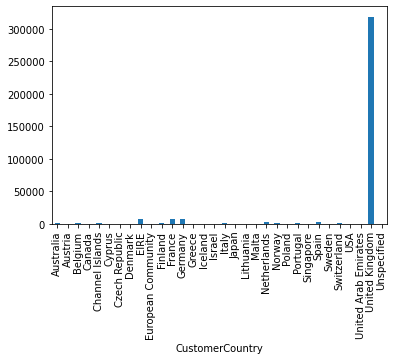

In [289]:
df['CustomerCountry'].groupby(df['CustomerCountry']).count().plot(kind='bar');

As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [290]:
df = df[df['CustomerCountry'] == 'United Kingdom']
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
318654,581585,2011-09-12 12:31:00,1.95,15804,United Kingdom,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.40
318655,581586,2011-09-12 12:49:00,2.95,13113,United Kingdom,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.60
318656,581586,2011-09-12 12:49:00,1.25,13113,United Kingdom,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,30.00
318657,581586,2011-09-12 12:49:00,8.95,13113,United Kingdom,21217,RED RETROSPOT ROUND CAKE TINS,24,214.80


In [291]:
df.drop('CustomerCountry', axis=1, inplace=True)

### Basket Dates

We noticed that 2010 data aren't enough representative, they are only a small fraction of the dataset and they appear to be only around the 12th of the month; in contrast 2011's data are more uniformely distributed, so we decide to keep only the latter:

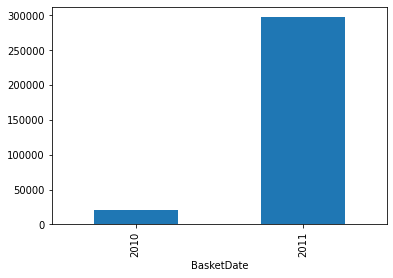

In [292]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar');

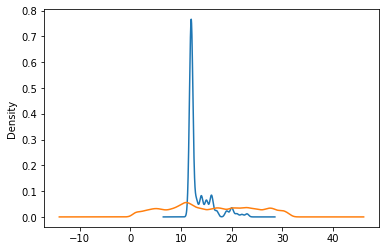

In [293]:
fig, ax = plt.subplots(1, 1)
df[df['BasketDate'].dt.year == 2010]['BasketDate'].dt.day.plot(kind='kde', ax=ax);
df[df['BasketDate'].dt.year == 2011]['BasketDate'].dt.day.plot(kind='kde', ax=ax);

In [294]:
df = df[df['BasketDate'].dt.year == 2011]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
297296,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
297297,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
297298,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,30.0
297299,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24,214.8


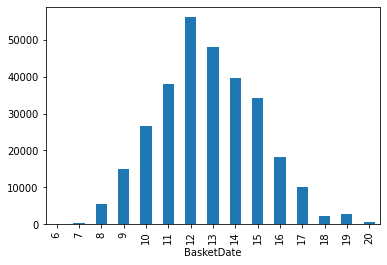

In [295]:
df['BasketDate'].groupby(df['BasketDate'].dt.hour).count().plot(kind='bar');

### Sales

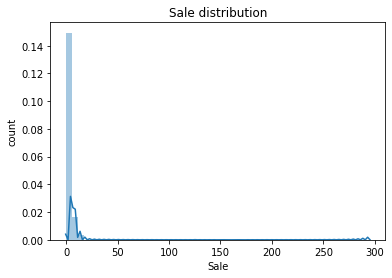

In [296]:
sns.distplot(df['Sale'])
plt.title('Sale distribution')
plt.xlabel('Sale')
plt.ylabel('count');

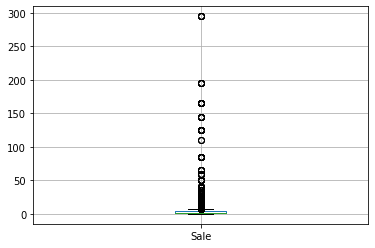

In [297]:
df.boxplot('Sale');

In [298]:
df[df['Sale'] == 0]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
2552,540372,2011-06-01 16:41:00,0.0,13081,22090,PAPER BUNTING RETROSPOT,24,0.0
2554,540372,2011-06-01 16:41:00,0.0,13081,22553,PLASTERS IN TIN SKULLS,24,0.0
6837,541109,2011-01-13 15:10:00,0.0,15107,22168,ORGANISER WOOD ANTIQUE WHITE,1,0.0
21622,543599,2011-10-02 13:08:00,0.0,17560,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,0.0
52827,548318,2011-03-30 12:45:00,0.0,13113,22055,MINI CAKE STAND HANGING STRAWBERY,5,0.0
56675,548871,2011-04-04 14:42:00,0.0,14410,22162,HEART GARLAND RUSTIC PADDED,2,0.0
82926,553000,2011-12-05 15:21:00,0.0,17667,47566,PARTY BUNTING,4,0.0
136749,561284,2011-07-26 12:24:00,0.0,16818,22167,OVAL WALL MIRROR DIAMANTE,1,0.0
200424,569716,2011-06-10 08:17:00,0.0,15804,22778,GLASS CLOCHE SMALL,2,0.0
224857,572893,2011-10-26 14:36:00,0.0,18059,21208,PASTEL COLOUR HONEYCOMB FAN,5,0.0


In [300]:
df['Sale'].replace(0, np.nan, inplace=True)
df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))

In [301]:
df['Sale'].isnull().any()

False

We can use the interquartile range method to reduce the outliers and distribution skewness:

- IQR = Q3 - Q1
- lower bound = Q1 - 1.5 * IQR
- upper bound = Q3 + 1.5 * IQR

In [302]:
q1 = df['Sale'].quantile(0.25)
q3 = df['Sale'].quantile(0.75)
IQR = q3 - q1
IQR

2.5

In [303]:
df = df[~((df['Sale'] < (q1 - 1.5 * IQR)) | (df['Sale'] > (q3 + 1.5 * IQR)))]
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
297295,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,11.4
297296,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
297297,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
297298,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,30.0


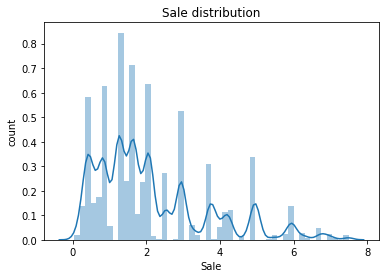

In [304]:
sns.distplot(df['Sale'])
plt.title('Sale distribution')
plt.xlabel('Sale')
plt.ylabel('count');

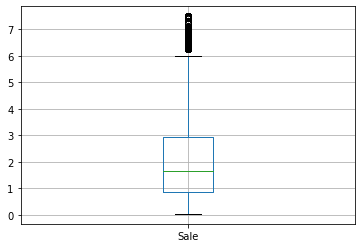

In [305]:
df.boxplot('Sale');

### Quantities

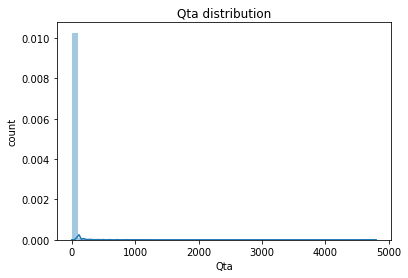

In [306]:
sns.distplot(df['Qta'])
plt.title('Qta distribution')
plt.xlabel('Qta')
plt.ylabel('count');

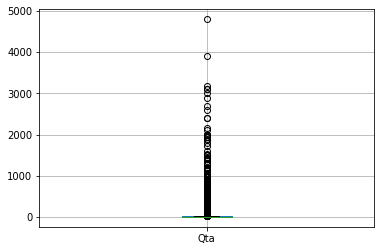

In [307]:
df.boxplot('Qta');

Also, we notice the presence of some negative quantities which can be considered as a canceled orders or refund:

We can use the interquartile range method to reduce the outliers and distribution skewness:

- IQR = Q3 - Q1
- lower bound = Q1 - 1.5 * IQR
- upper bound = Q3 + 1.5 * IQR

In [308]:
q1 = df['Qta'].quantile(0.25)
q3 = df['Qta'].quantile(0.75)
IQR = q3 - q1
IQR

10.0

In [309]:
df = df[~((df['Qta'] < (q1 - 1.5 * IQR)) | (df['Qta'] > (q3 + 1.5 * IQR)))]
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
297295,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,11.4
297296,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
297297,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
297298,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,30.0


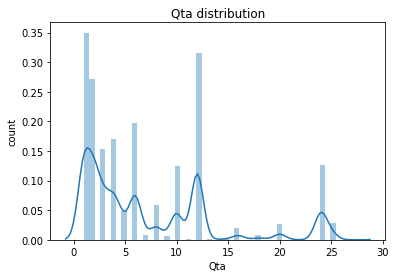

In [310]:
sns.distplot(df['Qta'])
plt.title('Qta distribution')
plt.xlabel('Qta')
plt.ylabel('count');

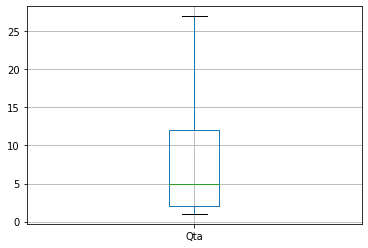

In [311]:
df.boxplot('Qta');

### Product Descriptions

In [312]:
df['ProdDescr'].isnull().any()

False

Now we need to remove the entries corresponding to lower or mixed case *ProdDescr* variable which will be not effective for the feature extraction step since they don't represent a product description:

In [313]:
df[(df['ProdDescr'].str.islower()) | # lower case
   (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case

array(['BAG 125g SWIRLY MARBLES', 'BAG 500g SWIRLY MARBLES',
       '3 TRADITIONAl BISCUIT CUTTERS  SET',
       'FRENCH BLUE METAL DOOR SIGN No', 'NUMBER TILE VINTAGE FONT No ',
       'BAG 250g SWIRLY MARBLES', 'POLYESTER FILLER PAD 40x40cm',
       'POLYESTER FILLER PAD 45x45cm', 'FOLK ART GREETING CARD,pack/12',
       'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 30CMx30CM',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'NUMBER TILE COTTAGE GARDEN No', 'POLYESTER FILLER PAD 65CMx65CM',
       'POLYESTER FILLER PAD 60x40cm', 'FLOWERS HANDBAG blue and orange',
       'THE KING GIFT BAG 25x24x12cm', 'High Resolution Image'],
      dtype=object)

In [314]:
df['ProdDescr'] = df['ProdDescr'].str.replace('[^\w\s]', '') # removing punctuation
df['ProdDescr'] = df['ProdDescr'].str.replace('\w*\d\w*', '') # removing words with numbers

df['ProdDescr'] = df['ProdDescr'].str.strip() # removing spaces at the beginning and at the end

# adjusting specific errors
df['ProdDescr'] = df['ProdDescr'].str.replace('No', '') # removing 'No'
df['ProdDescr'].replace({'TRADITIONAl BISCUIT CUTTERS  SET': 'TRADITIONAl BISCUIT CUTTERS  SET'.upper()}, inplace=True)
df['ProdDescr'].replace({'FLOWERS HANDBAG blue and orange': 'FLOWERS HANDBAG blue and orange'.upper()}, inplace=True)

bad_descr = df[(df['ProdDescr'].str.islower()) | # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case
bad_descr

array(['High Resolution Image'], dtype=object)

In [315]:
df = df[~(df['ProdDescr'].isin(bad_descr))]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
255536,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC TLIGHT HOLDER STAR LARGE,12,11.4
255537,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
255538,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
255539,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24,30.0


## Saving the new dataset

In [316]:
df.to_csv('../dataset/new_customer_supermarket.csv', sep='\t')